import necessary libraries

In [1]:
import pandas as pd
import os
import glob 

In [3]:
df = pd.read_csv('../Sales_Data/Sales_September_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


task 1 merge the 12 months of sales data into a single CSV file

In [3]:

file_pattern = ".csv"
list_of_files = [file for file in glob.glob('Sales_Data/*'.format(file_pattern))]
for file in list_of_files:
    print(file)

Sales_Data\Sales_April_2019.csv
Sales_Data\Sales_August_2019.csv
Sales_Data\Sales_December_2019.csv
Sales_Data\Sales_February_2019.csv
Sales_Data\Sales_January_2019.csv
Sales_Data\Sales_July_2019.csv
Sales_Data\Sales_June_2019.csv
Sales_Data\Sales_March_2019.csv
Sales_Data\Sales_May_2019.csv
Sales_Data\Sales_November_2019.csv
Sales_Data\Sales_October_2019.csv
Sales_Data\Sales_September_2019.csv
Sales_Data\Total_Sales_2019.csv


# merge 12 month of sales data using concat 

# dont run all the time

In [4]:
path = 'Sales_Data' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in all_files))
###df.head() i commented the below code because if i run it all the time it will create csv file
###df.to_csv('Sales_Data/Total_Sales_2019.csv', index = False, header=True)

In [6]:
all_data = pd.read_csv('Sales_Data/Total_Sales_2019.csv')
all_data.head()

NameError: name 'pd' is not defined

In [2]:
all_data.head()

NameError: name 'all_data' is not defined

#### Question 1: What was the best month for sales? How much was earned that month

Clean up data

df = pd.read_csv('Sales_Data/Sales_September_2019.csv')
df2 = df.sort_values(by=['Order Date'])
df2.head()

    Drop row of NAN

In [6]:
df = all_data.sort_values(by=['Order Date']) 
df = df.dropna(how='any') 
df = df[df['Order Date'] != 'Order Date'] 

df['date'] = pd.to_datetime(df['Order Date']).dt.date

df['time'] = pd.to_datetime(df['Order Date']).dt.time

df['month']= pd.to_datetime(df['date']).dt.month

df['Price Each']= df['Price Each'].astype(float)


df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,time,month
73891,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",2019-01-01,03:07:00,1
74701,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",2019-01-01,03:40:00,1
76054,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",2019-01-01,04:56:00,1
76708,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",2019-01-01,05:53:00,1
76061,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",2019-01-01,06:03:00,1
...,...,...,...,...,...,...,...,...,...
33264,298406,AAA Batteries (4-pack),2,2.99,12/31/19 23:42,"30 Elm St, San Francisco, CA 94016",2019-12-31,23:42:00,12
32308,297481,AA Batteries (4-pack),1,3.84,12/31/19 23:42,"82 Hill St, Dallas, TX 75001",2019-12-31,23:42:00,12
52781,317048,AAA Batteries (4-pack),2,2.99,12/31/19 23:45,"743 Adams St, San Francisco, CA 94016",2019-12-31,23:45:00,12
45172,309773,AAA Batteries (4-pack),1,2.99,12/31/19 23:52,"60 Hickory St, Los Angeles, CA 90001",2019-12-31,23:52:00,12


create new columns (date, time, month) from colume Order Date example 01/01/19 03:07 => to date( 01/01/19) time(03:07) month(0

get row at index


In [7]:
df.iloc[[51]]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,time,month
67555,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001",2019-01-01,10:30:00,1


create one columne PE which showes prive each * quantity order als we converted the strings to int/ float 

In [8]:

df['PE'] = pd.to_numeric(df['Price Each'], downcast="float")
df["total price"] = df['PE'] * df['Quantity Ordered'].astype(int)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,time,month,PE,total price
73891,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",2019-01-01,03:07:00,1,11.99,11.99
74701,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",2019-01-01,03:40:00,1,11.95,11.95
76054,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",2019-01-01,04:56:00,1,150.00,150.00
76708,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",2019-01-01,05:53:00,1,2.99,2.99
76061,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",2019-01-01,06:03:00,1,11.95,23.90
...,...,...,...,...,...,...,...,...,...,...,...
33264,298406,AAA Batteries (4-pack),2,2.99,12/31/19 23:42,"30 Elm St, San Francisco, CA 94016",2019-12-31,23:42:00,12,2.99,5.98
32308,297481,AA Batteries (4-pack),1,3.84,12/31/19 23:42,"82 Hill St, Dallas, TX 75001",2019-12-31,23:42:00,12,3.84,3.84
52781,317048,AAA Batteries (4-pack),2,2.99,12/31/19 23:45,"743 Adams St, San Francisco, CA 94016",2019-12-31,23:45:00,12,2.99,5.98
45172,309773,AAA Batteries (4-pack),1,2.99,12/31/19 23:52,"60 Hickory St, Los Angeles, CA 90001",2019-12-31,23:52:00,12,2.99,2.99


In [9]:
 df = df.sort_values('month')
results = df.groupby(pd.to_datetime(df['date']).dt.strftime('%B'), sort= False)['total price'].sum() #add sort= False  to avoid default sort in groupby
results


date
January      1822256.75
February     2202022.50
March        2807100.25
April        3390670.25
May          3152606.75
June         2577802.25
July         2647775.75
August       2244467.75
September    2097560.00
October      3736726.75
November     3199603.25
December     4613443.50
Name: total price, dtype: float32

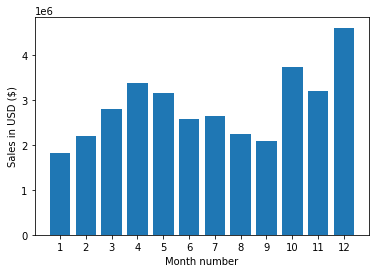

In [10]:
import matplotlib.pyplot as plt

month = range(1,13)
plt.bar(month, results)
plt.xticks(month)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [11]:
df['city'] = df['Purchase Address'].str.split(',').str[1]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,time,month,PE,total price,city
73891,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",2019-01-01,03:07:00,1,11.99,11.99,New York City
72487,145927,Vareebadd Phone,1,400.00,01/21/19 19:02,"148 8th St, San Francisco, CA 94016",2019-01-21,19:02:00,1,400.00,400.00,San Francisco
72489,145927,Wired Headphones,1,11.99,01/21/19 19:02,"148 8th St, San Francisco, CA 94016",2019-01-21,19:02:00,1,11.99,11.99,San Francisco
68682,142315,Wired Headphones,1,11.99,01/21/19 19:04,"869 Main St, San Francisco, CA 94016",2019-01-21,19:04:00,1,11.99,11.99,San Francisco
69699,143274,iPhone,1,700.00,01/21/19 19:08,"667 Forest St, San Francisco, CA 94016",2019-01-21,19:08:00,1,700.00,700.00,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...
50169,314563,Lightning Charging Cable,1,14.95,12/11/19 16:06,"762 Pine St, New York City, NY 10001",2019-12-11,16:06:00,12,14.95,14.95,New York City
54468,318666,AAA Batteries (4-pack),1,2.99,12/11/19 16:00,"12 Forest St, New York City, NY 10001",2019-12-11,16:00:00,12,2.99,2.99,New York City
54066,318280,AA Batteries (4-pack),1,3.84,12/11/19 15:59,"591 10th St, San Francisco, CA 94016",2019-12-11,15:59:00,12,3.84,3.84,San Francisco
46332,310895,Apple Airpods Headphones,1,150.00,12/11/19 16:34,"261 Cedar St, New York City, NY 10001",2019-12-11,16:34:00,12,150.00,150.00,New York City


In [12]:

re = df.groupby('city').sum()
re

,Price Each,month,PE,total price
city,,,,
Atlanta,2.779908e+06,104794,2779908.250,2795498.50
Austin,1.809874e+06,69829,1809873.625,1819581.75
Boston,3.637410e+06,141112,3637409.750,3661642.00
Dallas,2.752628e+06,104620,2752627.750,2767975.50
Los Angeles,5.421435e+06,208325,5421435.000,5452571.00
New York City,4.635371e+06,175741,4635371.000,4664317.50
Portland,2.307747e+06,87765,2307747.500,2320490.50
San Francisco,8.211462e+06,315520,8211461.500,8262204.00
Seattle,2.733296e+06,104941,2733296.000,2747755.50


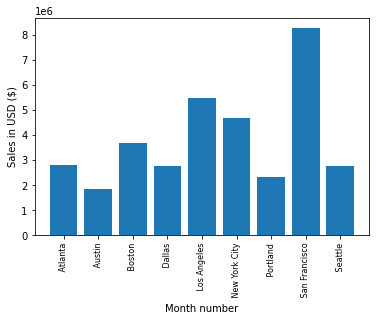

In [118]:
import matplotlib.pyplot as plt


city = [city for city, df in df.groupby('city')]
plt.bar(city, re['total price'])
plt.xticks(city, rotation = 'vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [13]:
newDF = df
newDF['Order Date'] = pd.to_datetime(df['Order Date'])

In [14]:
newDF['hour'] = newDF['Order Date'].dt.hour
newDF['minute'] = newDF['Order Date'].dt.minute
newDF

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,time,month,PE,total price,city,hour,minute
73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",2019-01-01,03:07:00,1,11.99,11.99,New York City,3,7
72487,145927,Vareebadd Phone,1,400.00,2019-01-21 19:02:00,"148 8th St, San Francisco, CA 94016",2019-01-21,19:02:00,1,400.00,400.00,San Francisco,19,2
72489,145927,Wired Headphones,1,11.99,2019-01-21 19:02:00,"148 8th St, San Francisco, CA 94016",2019-01-21,19:02:00,1,11.99,11.99,San Francisco,19,2
68682,142315,Wired Headphones,1,11.99,2019-01-21 19:04:00,"869 Main St, San Francisco, CA 94016",2019-01-21,19:04:00,1,11.99,11.99,San Francisco,19,4
69699,143274,iPhone,1,700.00,2019-01-21 19:08:00,"667 Forest St, San Francisco, CA 94016",2019-01-21,19:08:00,1,700.00,700.00,San Francisco,19,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50169,314563,Lightning Charging Cable,1,14.95,2019-12-11 16:06:00,"762 Pine St, New York City, NY 10001",2019-12-11,16:06:00,12,14.95,14.95,New York City,16,6
54468,318666,AAA Batteries (4-pack),1,2.99,2019-12-11 16:00:00,"12 Forest St, New York City, NY 10001",2019-12-11,16:00:00,12,2.99,2.99,New York City,16,0
54066,318280,AA Batteries (4-pack),1,3.84,2019-12-11 15:59:00,"591 10th St, San Francisco, CA 94016",2019-12-11,15:59:00,12,3.84,3.84,San Francisco,15,59
46332,310895,Apple Airpods Headphones,1,150.00,2019-12-11 16:34:00,"261 Cedar St, New York City, NY 10001",2019-12-11,16:34:00,12,150.00,150.00,New York City,16,34


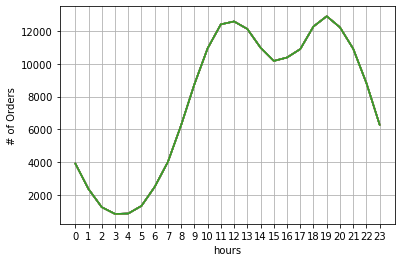

In [15]:
hours = [hours for hours, df in newDF.groupby('hour')]
plt.plot(hours, newDF.groupby(['hour']).count())
plt.xticks(hours)
plt.ylabel('# of Orders')
plt.xlabel('hours')
plt.grid()
plt.show()

What products are most often SOld together

In [16]:
df = df[df['Order ID'].duplicated(keep=False)]

newFD = df
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-16-b4e91a770c52>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [17]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('Lightning Charging Cable', 'iPhone') 516
('USB-C Charging Cable', 'Google Phone') 514
('iPhone', 'Lightning Charging Cable') 499
('Google Phone', 'USB-C Charging Cable') 485
('iPhone', 'Wired Headphones') 244
('Wired Headphones', 'Google Phone') 222
('Wired Headphones', 'iPhone') 218
('Google Phone', 'Wired Headphones') 201
('Vareebadd Phone', 'USB-C Charging Cable') 193
('Apple Airpods Headphones', 'iPhone') 190


In [24]:
product_group = newFD.groupby('Product')
product_group.sum()

,Price Each,month,PE,total price,hour,minute
Product,,,,,,
20in Monitor,17488.41,1101,1.748841e+04,1.770839e+04,2196,4653
27in 4K Gaming Monitor,97887.49,1714,9.788748e+04,9.788748e+04,3729,7839
27in FHD Monitor,44097.06,2155,4.409706e+04,4.469702e+04,4341,8791
34in Ultrawide Monitor,93477.54,1739,9.347754e+04,9.385753e+04,3568,7069
AA Batteries (4-pack),2949.12,5512,2.949120e+03,3.889920e+03,11090,23056
AAA Batteries (4-pack),2436.85,5921,2.436850e+03,3.740490e+03,11748,23924
Apple Airpods Headphones,146100.00,6770,1.461000e+05,1.473000e+05,14033,28457
Bose SoundSport Headphones,81991.80,5730,8.199180e+04,8.269173e+04,11944,24796
Flatscreen TV,53400.00,1256,5.340000e+04,5.370000e+04,2523,5524


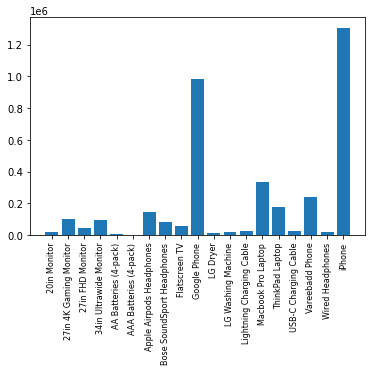

In [22]:
import matplotlib.pyplot as plt

product_group = newFD.groupby('Product')
quantity_ordered = product_group.sum()['Price Each']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()